## Read data matrix

In [1]:
import pandas as pd
import psycopg2

# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'omop_cdm'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

dataQuery = """select * from sepsis_icd.data_matrix_2 where sepsis = 1;"""
dataDf = pd.read_sql_query(dataQuery, con)
dataDf

,visit_occurrence_id,person_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,temp_max,heartrate_max,breath_rate_vent_max,breath_rate_spon_max,...,bicarbonate_last,hemoglobin_last,creatinine_last,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality,sepsis
0,-2147304039,1052438339,Emergency Room - Hospital,214.0,EW EMER.,EMERGENCY ROOM,36.9,NaN,NaN,NaN,...,29.0,10.8,0.6,False,False,False,False,False,False,1
1,-2147002424,-1242295740,Emergency Room and Inpatient Visit,573.0,URGENT,TRANSFER FROM HOSPITAL,99.1,111.0,NaN,NaN,...,14.0,7.3,0.3,False,False,False,False,False,False,1
2,-2144345945,2004496459,Inpatient Visit,684.0,ELECTIVE,PHYSICIAN REFERRAL,38.3,NaN,NaN,NaN,...,22.0,8.0,1.0,False,False,False,False,False,False,1
3,-2137779334,1692040065,Emergency Room and Inpatient Visit,134.0,URGENT,TRANSFER FROM HOSPITAL,99.0,112.0,14.0,14.0,...,27.0,10.8,0.5,False,False,False,False,False,False,1
4,-2136505586,-647215717,Emergency Room and Inpatient Visit,1240.0,URGENT,TRANSFER FROM HOSPITAL,102.1,141.0,24.0,26.0,...,26.0,8.8,4.9,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,2144084743,-543633336,Emergency Room and Inpatient Visit,139.0,URGENT,TRANSFER FROM HOSPITAL,99.1,116.0,16.0,31.0,...,33.0,9.3,0.5,False,False,False,False,False,False,1
11517,2144805894,-251264248,Emergency Room - Hospital,125.0,EW EMER.,EMERGENCY ROOM,99.2,104.0,NaN,NaN,...,24.0,7.2,0.9,False,False,False,False,False,False,1
11518,2145278835,1177429874,Emergency Room - Hospital,553.0,EW EMER.,EMERGENCY ROOM,103.1,125.0,NaN,NaN,...,21.0,8.2,1.8,False,False,False,False,False,False,1
11519,2146770624,-1169554980,Emergency Room - Hospital,127.0,EW EMER.,EMERGENCY ROOM,102.2,109.0,NaN,NaN,...,21.0,8.1,1.0,False,False,False,False,False,False,1


## Missing data

<AxesSubplot:>

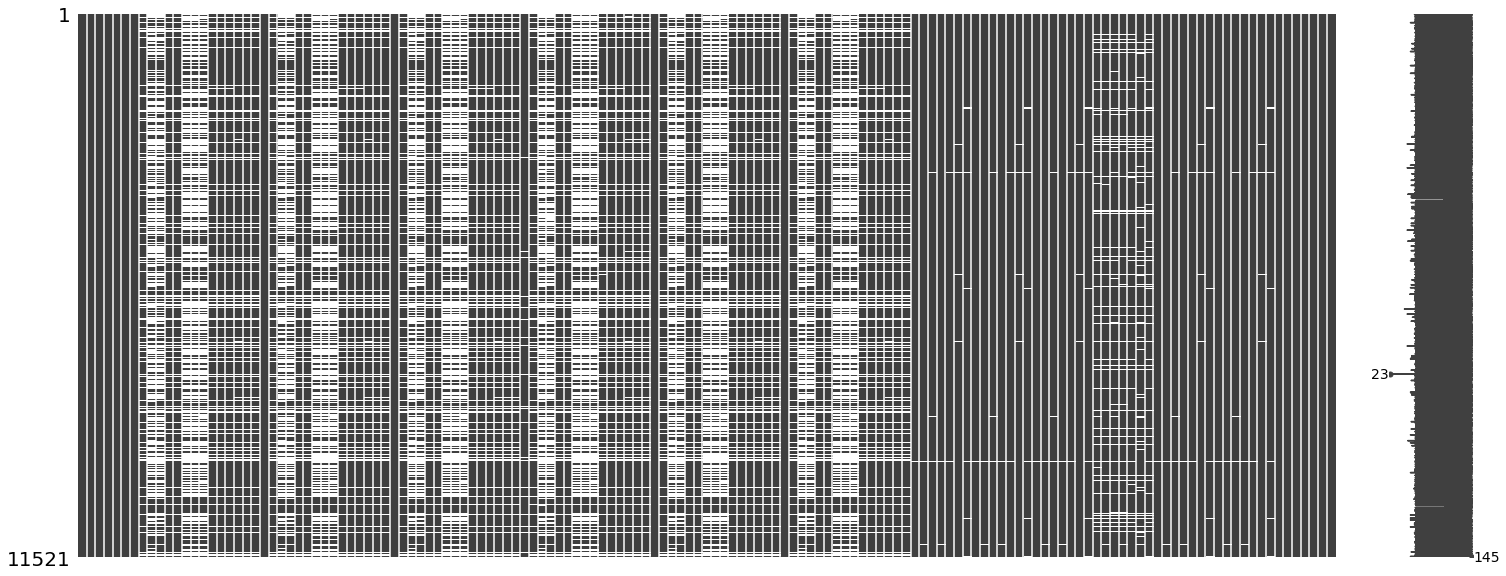

In [2]:
import missingno as msno

msno.matrix(dataDf)

<AxesSubplot:>

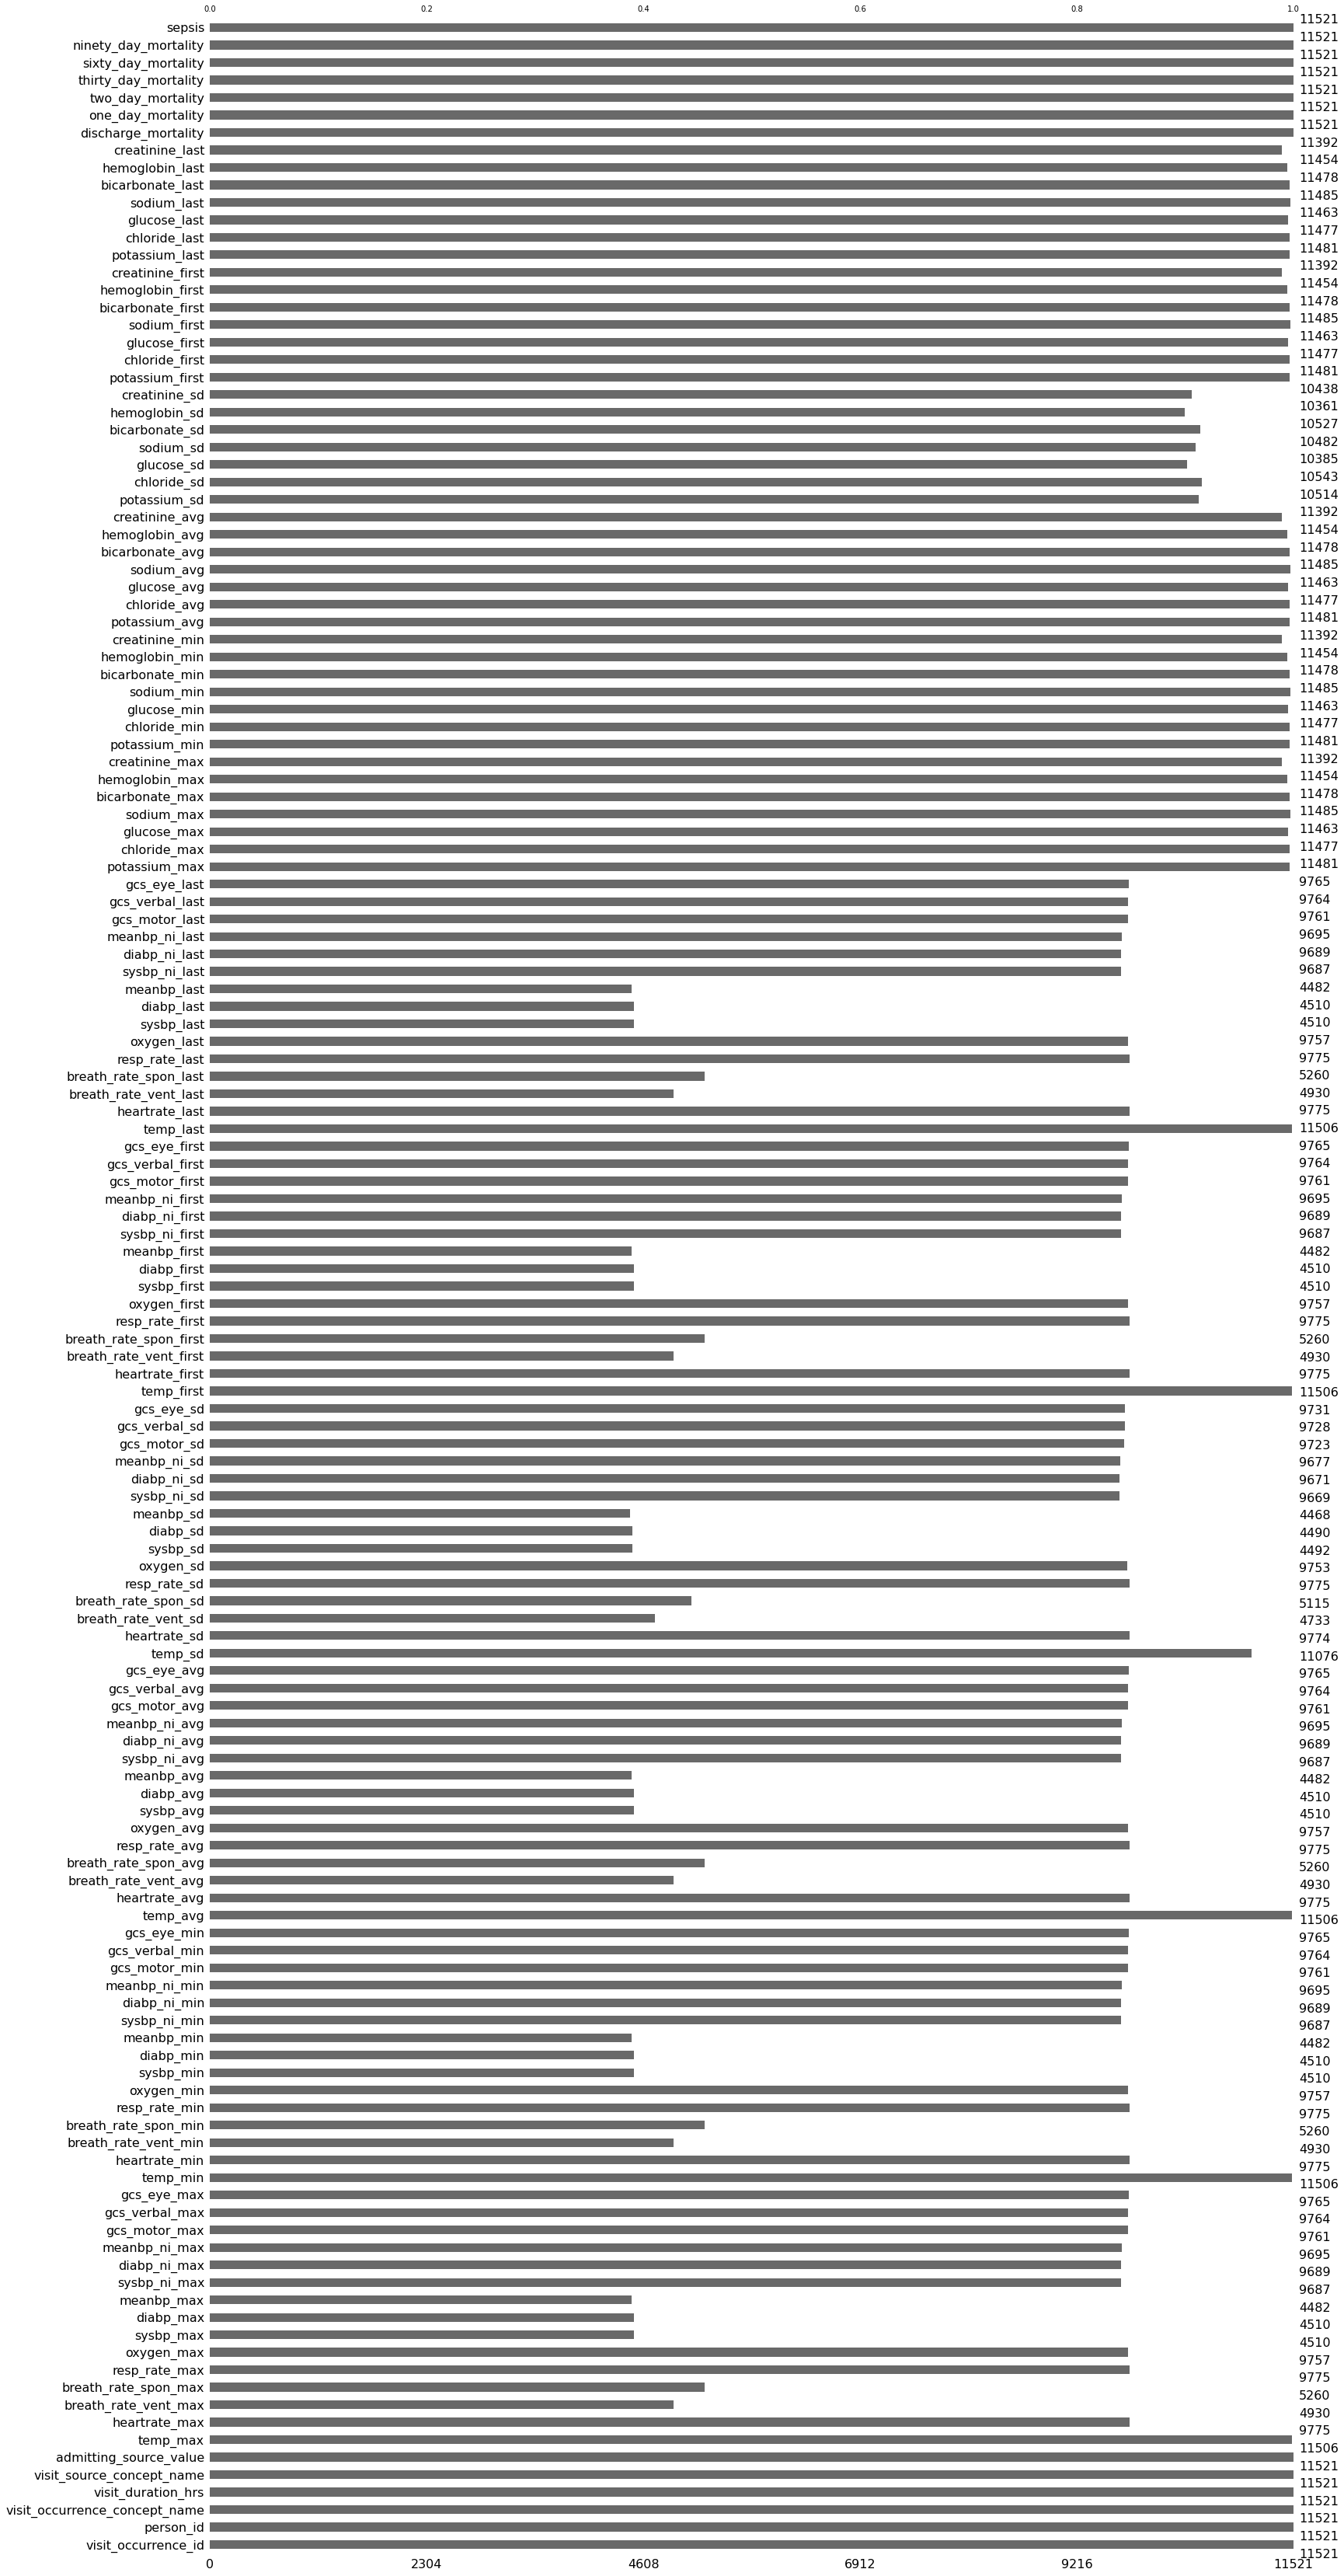

In [3]:
import missingno as msno

msno.bar(dataDf)

## One-hot-encode categorical columns

In [4]:
for catCol in ['visit_occurrence_concept_name', 'visit_source_concept_name', 'admitting_source_value']:
    dummyDf = pd.get_dummies(dataDf[catCol])
    dataDf.drop(catCol, axis = 1, inplace=True)
    dataDf = dataDf.join(dummyDf)
dataDf

,visit_occurrence_id,person_id,visit_duration_hrs,temp_max,heartrate_max,breath_rate_vent_max,breath_rate_spon_max,resp_rate_max,oxygen_max,sysbp_max,...,CLINIC REFERRAL,EMERGENCY ROOM,INFORMATION NOT AVAILABLE,INTERNAL TRANSFER TO OR FROM PSYCH,PACU,PHYSICIAN REFERRAL,PROCEDURE SITE,TRANSFER FROM HOSPITAL,TRANSFER FROM SKILLED NURSING FACILITY,WALK-IN/SELF REFERRAL
0,-2147304039,1052438339,214.0,36.9,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,-2147002424,-1242295740,573.0,99.1,111.0,NaN,NaN,39.0,100.0,NaN,...,0,0,0,0,0,0,0,1,0,0
2,-2144345945,2004496459,684.0,38.3,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,-2137779334,1692040065,134.0,99.0,112.0,14.0,14.0,28.0,100.0,146.0,...,0,0,0,0,0,0,0,1,0,0
4,-2136505586,-647215717,1240.0,102.1,141.0,24.0,26.0,33.0,100.0,165.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,2144084743,-543633336,139.0,99.1,116.0,16.0,31.0,31.0,100.0,NaN,...,0,0,0,0,0,0,0,1,0,0
11517,2144805894,-251264248,125.0,99.2,104.0,NaN,NaN,22.0,100.0,NaN,...,0,1,0,0,0,0,0,0,0,0
11518,2145278835,1177429874,553.0,103.1,125.0,NaN,NaN,39.0,100.0,NaN,...,0,1,0,0,0,0,0,0,0,0
11519,2146770624,-1169554980,127.0,102.2,109.0,NaN,NaN,36.0,100.0,NaN,...,0,1,0,0,0,0,0,0,0,0


## Standardise data

In [5]:
cols = ["visit_duration_hrs", "temp_max", "heartrate_max", "breath_rate_vent_max", "breath_rate_spon_max", "resp_rate_max", "oxygen_max", "sysbp_max", "diabp_max", "meanbp_max", "sysbp_ni_max", "diabp_ni_max", "meanbp_ni_max", "gcs_motor_max", "gcs_verbal_max", "gcs_eye_max", "temp_min", "heartrate_min", "breath_rate_vent_min", "breath_rate_spon_min", "resp_rate_min", "oxygen_min", "sysbp_min", "diabp_min", "meanbp_min", "sysbp_ni_min", "diabp_ni_min", "meanbp_ni_min", "gcs_motor_min", "gcs_verbal_min", "gcs_eye_min", "temp_avg", "heartrate_avg", "breath_rate_vent_avg", "breath_rate_spon_avg", "resp_rate_avg", "oxygen_avg", "sysbp_avg", "diabp_avg", "meanbp_avg", "sysbp_ni_avg", "diabp_ni_avg", "meanbp_ni_avg", "gcs_motor_avg", "gcs_verbal_avg", "gcs_eye_avg", "temp_sd", "heartrate_sd", "breath_rate_vent_sd", "breath_rate_spon_sd", "resp_rate_sd", "oxygen_sd", "sysbp_sd", "diabp_sd", "meanbp_sd", "sysbp_ni_sd", "diabp_ni_sd", "meanbp_ni_sd", "gcs_motor_sd", "gcs_verbal_sd", "gcs_eye_sd", "temp_first", "heartrate_first", "breath_rate_vent_first", "breath_rate_spon_first", "resp_rate_first", "oxygen_first", "sysbp_first", "diabp_first", "meanbp_first", "sysbp_ni_first", "diabp_ni_first", "meanbp_ni_first", "gcs_motor_first", "gcs_verbal_first", "gcs_eye_first", "temp_last", "heartrate_last", "breath_rate_vent_last", "breath_rate_spon_last", "resp_rate_last", "oxygen_last", "sysbp_last", "diabp_last", "meanbp_last", "sysbp_ni_last", "diabp_ni_last", "meanbp_ni_last", "gcs_motor_last", "gcs_verbal_last", "gcs_eye_last", "potassium_max", "chloride_max", "glucose_max", "sodium_max", "bicarbonate_max", "hemoglobin_max", "creatinine_max", "potassium_min", "chloride_min", "glucose_min", "sodium_min", "bicarbonate_min", "hemoglobin_min", "creatinine_min", "potassium_avg", "chloride_avg", "glucose_avg", "sodium_avg", "bicarbonate_avg", "hemoglobin_avg", "creatinine_avg", "potassium_sd", "chloride_sd", "glucose_sd", "sodium_sd", "bicarbonate_sd", "hemoglobin_sd", "creatinine_sd", "potassium_first", "chloride_first", "glucose_first", "sodium_first", "bicarbonate_first", "hemoglobin_first", "creatinine_first", "potassium_last", "chloride_last", "glucose_last", "sodium_last", "bicarbonate_last", "hemoglobin_last", "creatinine_last"]

In [6]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(dataDf[cols])
standardDf = pd.DataFrame(data, columns = cols)
standardDf

,visit_duration_hrs,temp_max,heartrate_max,breath_rate_vent_max,breath_rate_spon_max,resp_rate_max,oxygen_max,sysbp_max,diabp_max,meanbp_max,...,bicarbonate_first,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last
0,-0.298567,-2.312671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.200788,0.333066,-0.815448,-1.186819,-2.843820,2.031557,-0.757336,0.898238,0.816059,-0.736365
1,0.474897,0.388961,-0.286378,NaN,NaN,1.278164,0.318216,NaN,NaN,NaN,...,-2.095619,-0.059306,-0.976023,-0.668035,-0.062589,-0.555414,-0.559555,-1.708890,-1.269585,-0.975811
2,0.714046,-2.251862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.932181,-0.500726,-0.092861,1.234175,-0.835153,0.678372,-0.559555,-0.318422,-0.852456,-0.417104
3,-0.470927,0.384618,-0.234880,-1.187742,-0.806811,-0.776103,0.318216,-0.355044,-0.289811,-0.555223,...,0.231257,0.578299,-0.815448,-0.149250,-0.680640,-0.256918,-1.944020,0.550621,0.816059,-0.816180
4,1.911945,0.519265,1.258572,0.444290,0.172797,0.157655,0.318216,0.490717,1.100091,1.608603,...,-1.126087,-0.598819,1.673464,-0.149250,-0.680640,-0.376316,-0.757336,0.376812,-0.375737,2.695693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,-0.460154,0.388961,-0.028886,-0.861335,0.580967,-0.215848,0.318216,NaN,NaN,NaN,...,0.619069,-0.647865,-0.976023,-0.149250,-1.298691,-0.336517,-0.559555,1.593471,-0.077788,-0.816180
11517,-0.490317,0.393305,-0.646867,NaN,NaN,-1.896612,0.318216,NaN,NaN,NaN,...,0.231257,-2.609728,-0.574585,-0.495107,0.555463,-0.595214,0.231568,0.029195,-1.329175,-0.496919
11518,0.431807,0.562700,0.434599,NaN,NaN,1.278164,0.318216,NaN,NaN,NaN,...,-1.126087,-1.236424,-0.173148,0.369534,-0.062589,-0.157419,-0.757336,-0.492230,-0.733276,0.221419
11519,-0.486008,0.523608,-0.389375,NaN,NaN,0.717909,0.318216,NaN,NaN,NaN,...,-0.544368,-0.647865,-0.494298,-1.186819,0.864488,-0.276818,-0.163994,-0.492230,-0.792866,-0.417104


In [7]:
dataDf = dataDf.drop(cols, axis = 1).join(standardDf)
dataDf

,visit_occurrence_id,person_id,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality,sepsis,Ambulatory Clinic / Center,...,bicarbonate_first,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last
0,-2147304039,1052438339,False,False,False,False,False,False,1,0,...,1.200788,0.333066,-0.815448,-1.186819,-2.843820,2.031557,-0.757336,0.898238,0.816059,-0.736365
1,-2147002424,-1242295740,False,False,False,False,False,False,1,0,...,-2.095619,-0.059306,-0.976023,-0.668035,-0.062589,-0.555414,-0.559555,-1.708890,-1.269585,-0.975811
2,-2144345945,2004496459,False,False,False,False,False,False,1,0,...,-0.932181,-0.500726,-0.092861,1.234175,-0.835153,0.678372,-0.559555,-0.318422,-0.852456,-0.417104
3,-2137779334,1692040065,False,False,False,False,False,False,1,0,...,0.231257,0.578299,-0.815448,-0.149250,-0.680640,-0.256918,-1.944020,0.550621,0.816059,-0.816180
4,-2136505586,-647215717,False,False,False,False,False,False,1,0,...,-1.126087,-0.598819,1.673464,-0.149250,-0.680640,-0.376316,-0.757336,0.376812,-0.375737,2.695693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,2144084743,-543633336,False,False,False,False,False,False,1,0,...,0.619069,-0.647865,-0.976023,-0.149250,-1.298691,-0.336517,-0.559555,1.593471,-0.077788,-0.816180
11517,2144805894,-251264248,False,False,False,False,False,False,1,0,...,0.231257,-2.609728,-0.574585,-0.495107,0.555463,-0.595214,0.231568,0.029195,-1.329175,-0.496919
11518,2145278835,1177429874,False,False,False,False,False,False,1,0,...,-1.126087,-1.236424,-0.173148,0.369534,-0.062589,-0.157419,-0.757336,-0.492230,-0.733276,0.221419
11519,2146770624,-1169554980,False,False,False,False,False,False,1,0,...,-0.544368,-0.647865,-0.494298,-1.186819,0.864488,-0.276818,-0.163994,-0.492230,-0.792866,-0.417104


In [8]:
dataDf['discharge_mortality'] = dataDf['discharge_mortality'].apply(lambda x: 1 if x else 0)
dataDf['one_day_mortality'] = dataDf['one_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['two_day_mortality'] = dataDf['two_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['thirty_day_mortality'] = dataDf['thirty_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['sixty_day_mortality'] = dataDf['sixty_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['ninety_day_mortality'] = dataDf['ninety_day_mortality'].apply(lambda x: 1 if x else 0)

In [9]:
dataDf

,visit_occurrence_id,person_id,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality,sepsis,Ambulatory Clinic / Center,...,bicarbonate_first,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last
0,-2147304039,1052438339,0,0,0,0,0,0,1,0,...,1.200788,0.333066,-0.815448,-1.186819,-2.843820,2.031557,-0.757336,0.898238,0.816059,-0.736365
1,-2147002424,-1242295740,0,0,0,0,0,0,1,0,...,-2.095619,-0.059306,-0.976023,-0.668035,-0.062589,-0.555414,-0.559555,-1.708890,-1.269585,-0.975811
2,-2144345945,2004496459,0,0,0,0,0,0,1,0,...,-0.932181,-0.500726,-0.092861,1.234175,-0.835153,0.678372,-0.559555,-0.318422,-0.852456,-0.417104
3,-2137779334,1692040065,0,0,0,0,0,0,1,0,...,0.231257,0.578299,-0.815448,-0.149250,-0.680640,-0.256918,-1.944020,0.550621,0.816059,-0.816180
4,-2136505586,-647215717,0,0,0,0,0,0,1,0,...,-1.126087,-0.598819,1.673464,-0.149250,-0.680640,-0.376316,-0.757336,0.376812,-0.375737,2.695693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,2144084743,-543633336,0,0,0,0,0,0,1,0,...,0.619069,-0.647865,-0.976023,-0.149250,-1.298691,-0.336517,-0.559555,1.593471,-0.077788,-0.816180
11517,2144805894,-251264248,0,0,0,0,0,0,1,0,...,0.231257,-2.609728,-0.574585,-0.495107,0.555463,-0.595214,0.231568,0.029195,-1.329175,-0.496919
11518,2145278835,1177429874,0,0,0,0,0,0,1,0,...,-1.126087,-1.236424,-0.173148,0.369534,-0.062589,-0.157419,-0.757336,-0.492230,-0.733276,0.221419
11519,2146770624,-1169554980,0,0,0,0,0,0,1,0,...,-0.544368,-0.647865,-0.494298,-1.186819,0.864488,-0.276818,-0.163994,-0.492230,-0.792866,-0.417104


## Test/Train split

In [44]:
X = dataDf.drop(['visit_occurrence_id', 'person_id', 'discharge_mortality', 'one_day_mortality', 'two_day_mortality', 'thirty_day_mortality', 'sixty_day_mortality', 'ninety_day_mortality', 'sepsis'], axis = 1)
y_discharge = dataDf['discharge_mortality']
y_one_day = dataDf['one_day_mortality']
y_two_day = dataDf['two_day_mortality']
y_thirty_day = dataDf['thirty_day_mortality']
y_sixty_day = dataDf['sixty_day_mortality']
y_ninety_day = dataDf['ninety_day_mortality']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_discharge_train, y_discharge_test, y_one_day_train, y_one_day_test, y_two_day_train, y_two_day_test, y_thirty_day_train, y_thirty_day_test, y_sixty_day_train, y_sixty_day_test, y_ninety_day_train, y_ninety_day_test = train_test_split(X, y_discharge, y_one_day, y_two_day, y_thirty_day, y_sixty_day, y_ninety_day, test_size=0.2, random_state=42)

In [46]:
X_train.shape, X_test.shape

((9216, 159), (2305, 159))

In [47]:
y_discharge_train.shape, y_discharge_test.shape

((9216,), (2305,))

In [48]:
y_one_day_train.shape, y_one_day_test.shape

((9216,), (2305,))

In [49]:
y_two_day_train.shape, y_two_day_test.shape

((9216,), (2305,))

In [50]:
y_thirty_day_train.shape, y_thirty_day_test.shape

((9216,), (2305,))

In [51]:
y_sixty_day_train.shape, y_sixty_day_test.shape

((9216,), (2305,))

In [52]:
y_ninety_day_train.shape, y_ninety_day_test.shape

((9216,), (2305,))

## Machine Learning using XGBoost

In [53]:
from xgboost import XGBClassifier
from matplotlib import pyplot as plt

In [54]:
xgb = XGBClassifier()
xgb.fit(X_train, y_discharge_train)
y_discharge_pred = xgb.predict(X_test)

/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 139 artists>

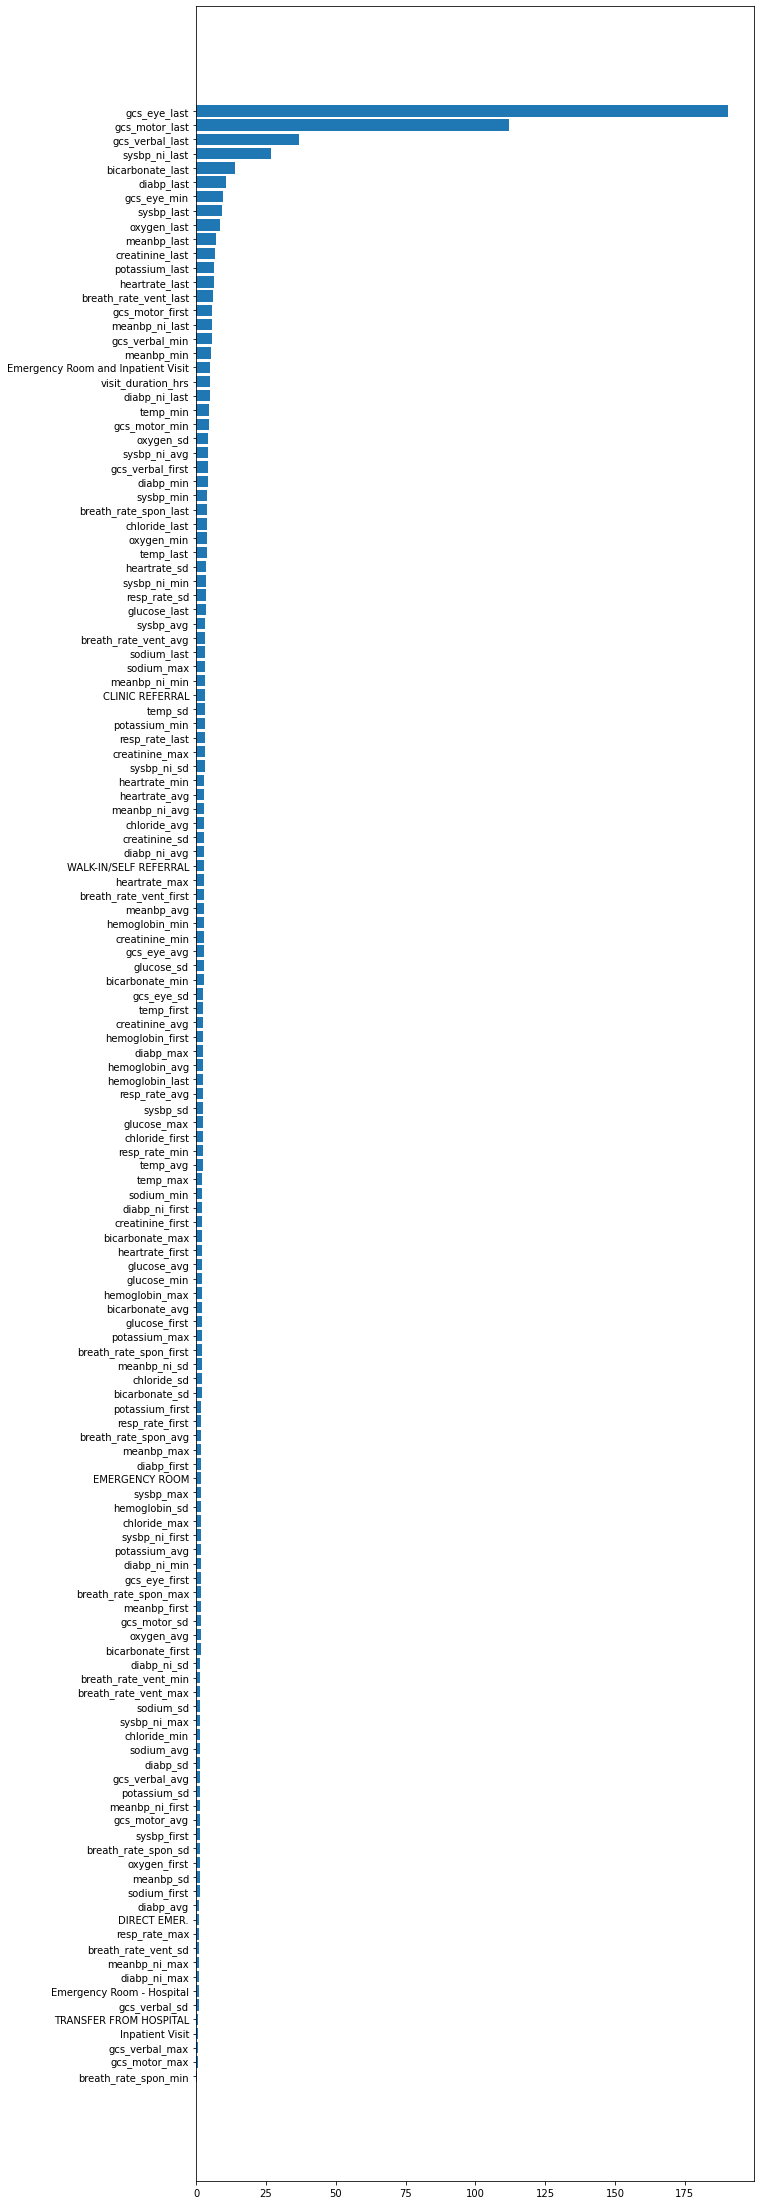

In [55]:
X_header = [x for x in X.columns.values]
X_header = X_header[0:-1]
feature_importance_list = []
feature_imp_dict = xgb.get_booster().get_score(importance_type="gain")
for feature, feature_imp in feature_imp_dict.items():
    feature_importance_list.append([feature, feature_imp])
xgbDf = pd.DataFrame(feature_importance_list, columns = ['feature', 'weight'])
xgbDf.sort_values('weight', inplace=True)
plt.figure(figsize=(10,40))
plt.barh(y=xgbDf.feature, width=xgbDf.weight)

In [56]:
xgb = XGBClassifier()
xgb.fit(X_train, y_one_day_train)
y_one_day_pred = xgb.predict(X_test)

/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 139 artists>

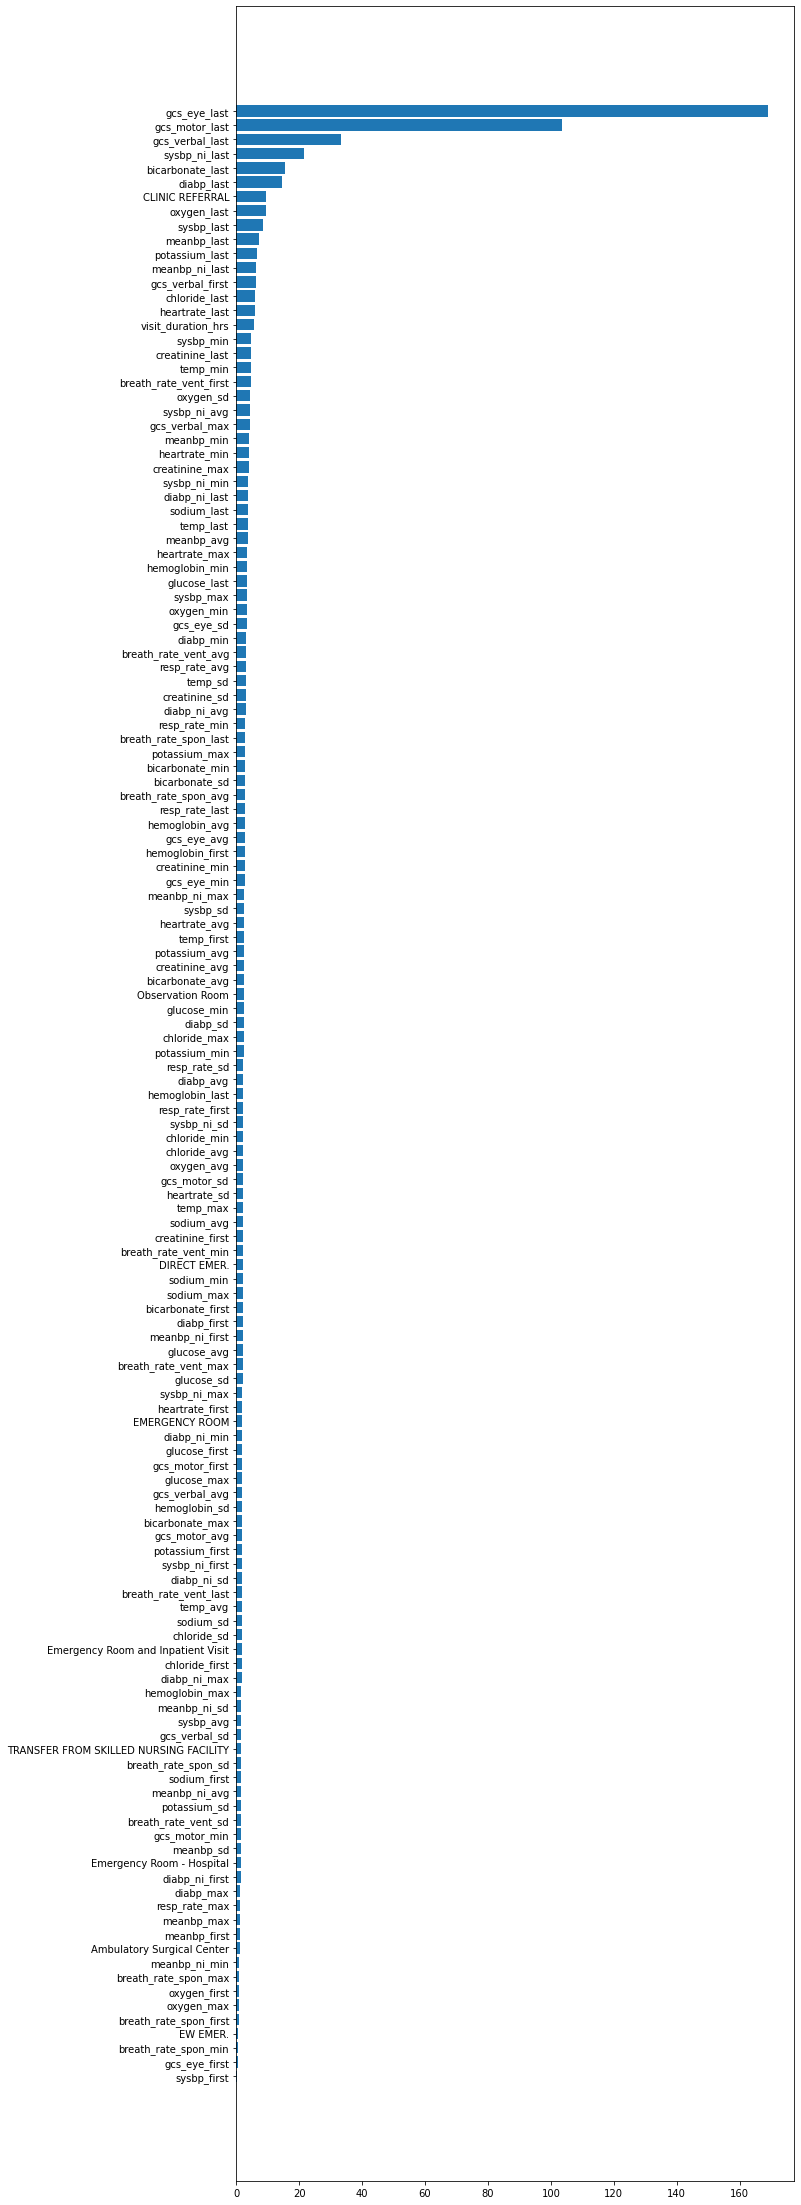

In [57]:
X_header = [x for x in X.columns.values]
X_header = X_header[0:-1]
feature_importance_list = []
feature_imp_dict = xgb.get_booster().get_score(importance_type="gain")
for feature, feature_imp in feature_imp_dict.items():
    feature_importance_list.append([feature, feature_imp])
xgbDf = pd.DataFrame(feature_importance_list, columns = ['feature', 'weight'])
xgbDf.sort_values('weight', inplace=True)
plt.figure(figsize=(10,40))
plt.barh(y=xgbDf.feature, width=xgbDf.weight)

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train, y_two_day_train)
y_two_day_pred = xgb.predict(X_test)

/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 139 artists>

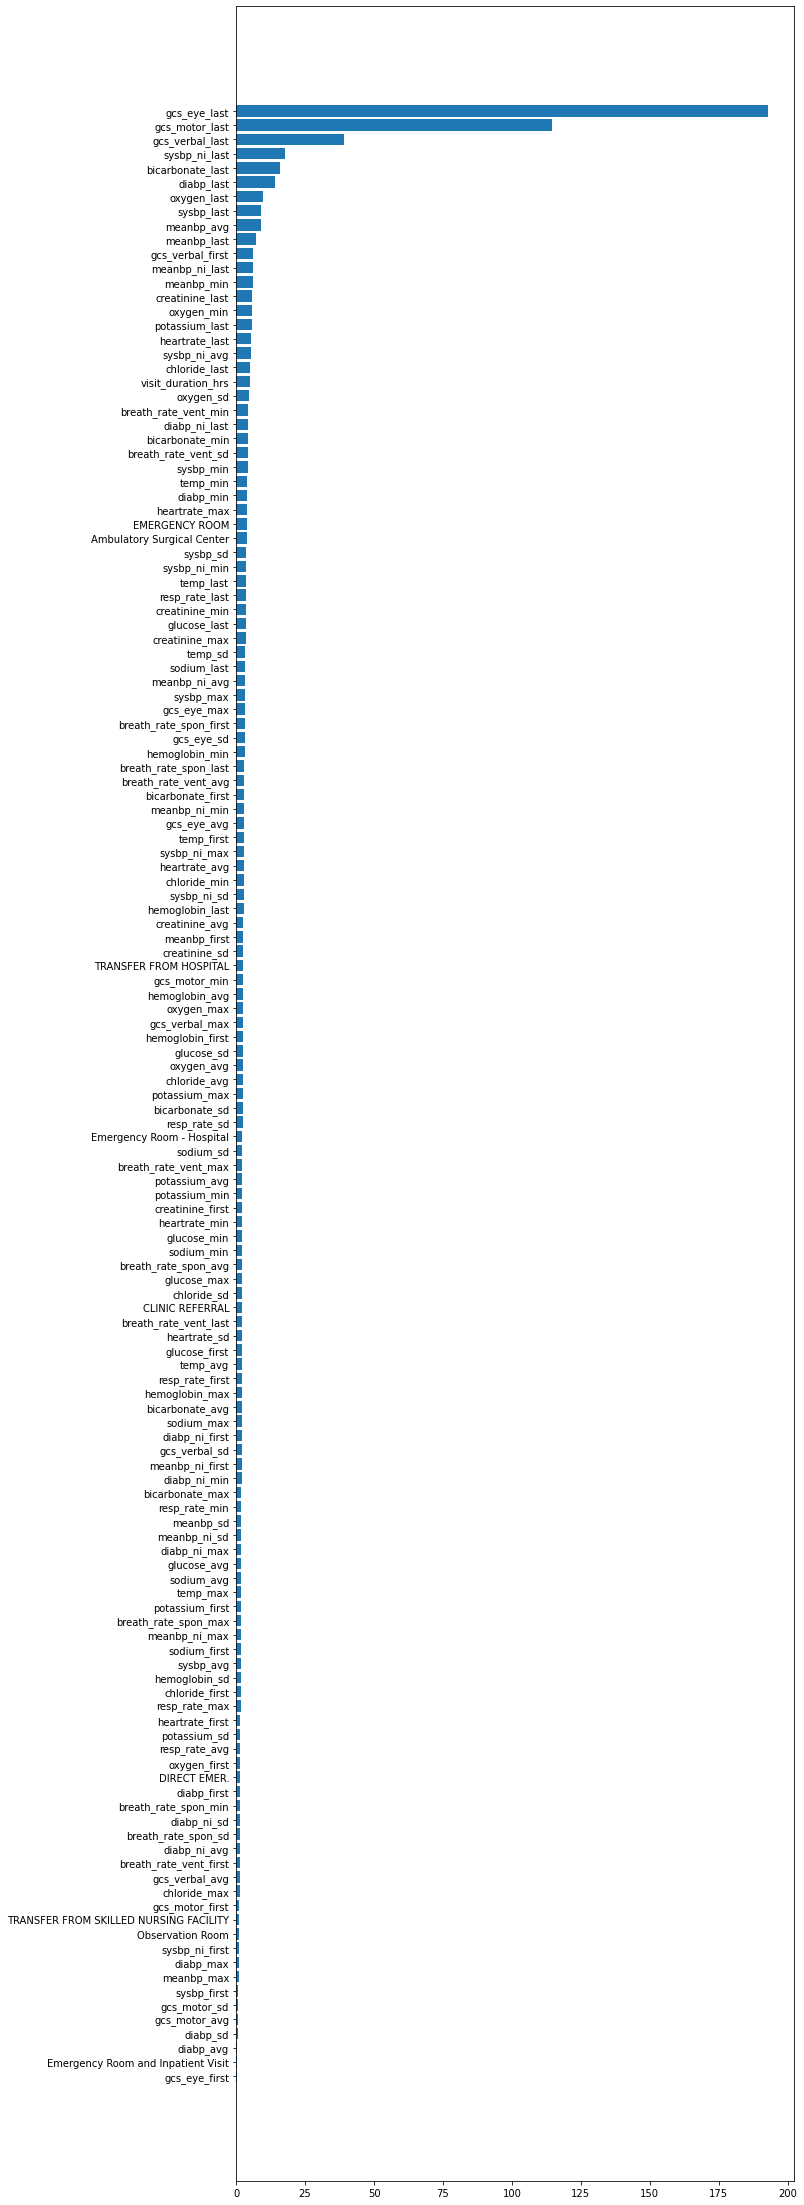

In [59]:
X_header = [x for x in X.columns.values]
X_header = X_header[0:-1]
feature_importance_list = []
feature_imp_dict = xgb.get_booster().get_score(importance_type="gain")
for feature, feature_imp in feature_imp_dict.items():
    feature_importance_list.append([feature, feature_imp])
xgbDf = pd.DataFrame(feature_importance_list, columns = ['feature', 'weight'])
xgbDf.sort_values('weight', inplace=True)
plt.figure(figsize=(10,40))
plt.barh(y=xgbDf.feature, width=xgbDf.weight)

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train, y_thirty_day_train)
y_thirty_day_pred = xgb.predict(X_test)

/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 139 artists>

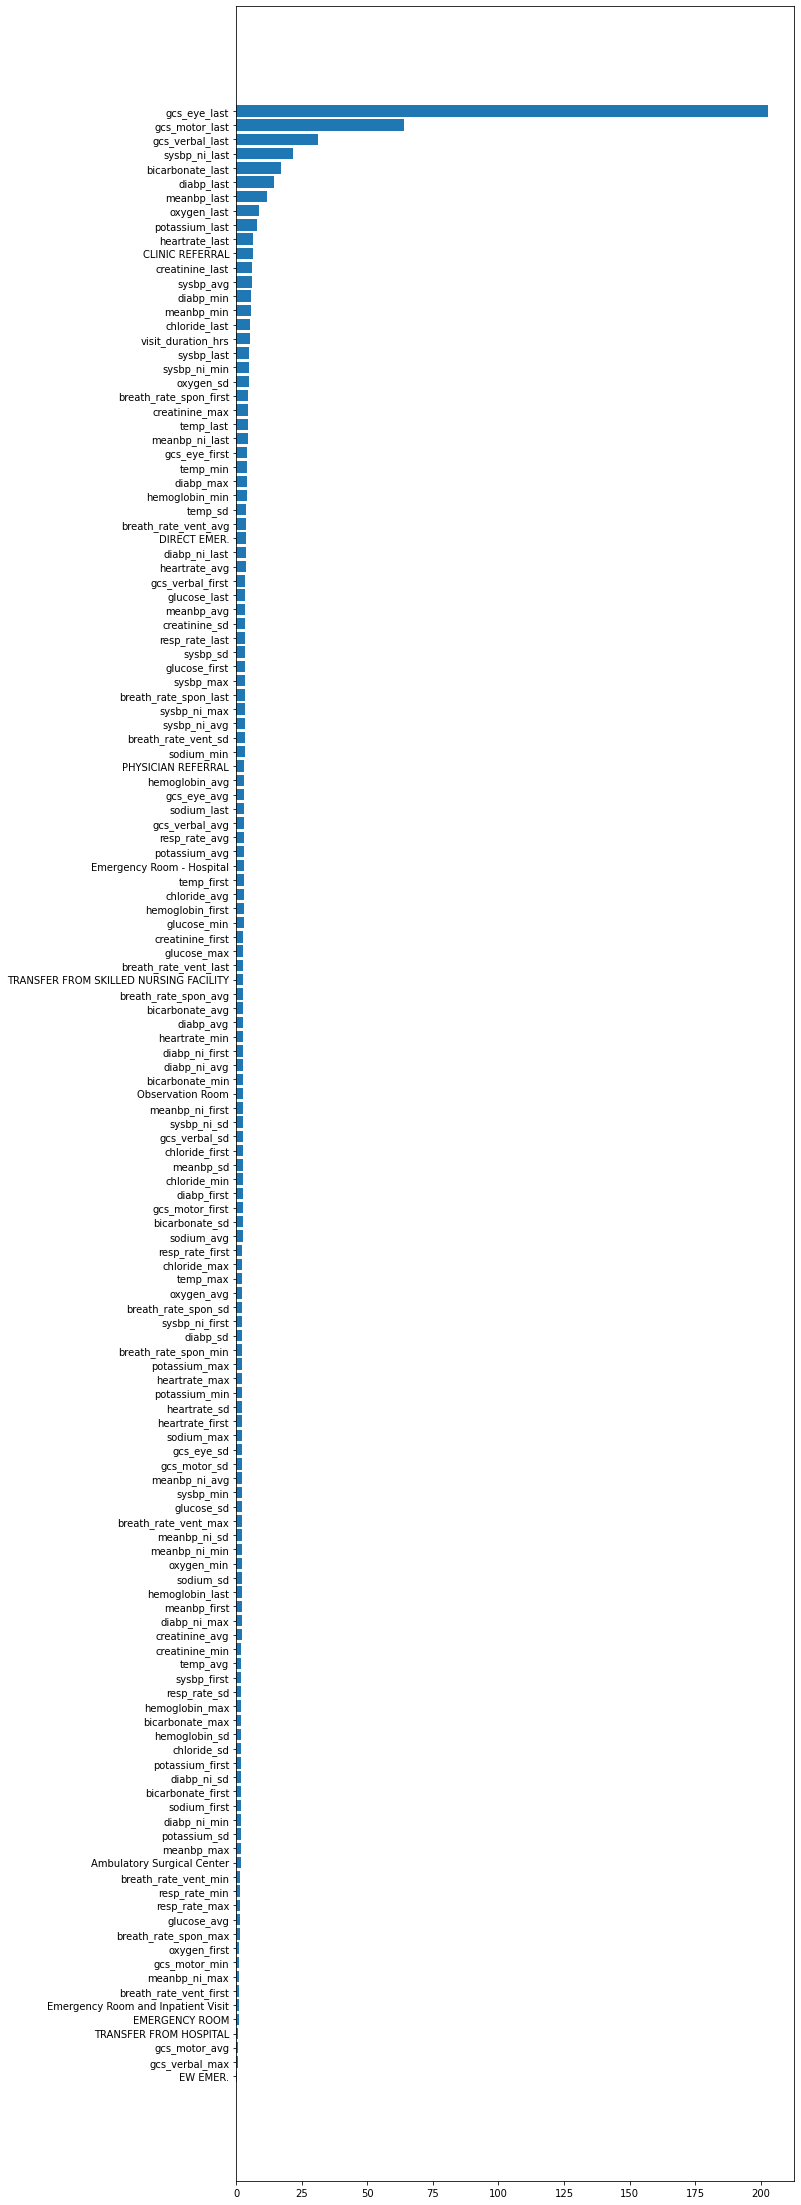

In [61]:
X_header = [x for x in X.columns.values]
X_header = X_header[0:-1]
feature_importance_list = []
feature_imp_dict = xgb.get_booster().get_score(importance_type="gain")
for feature, feature_imp in feature_imp_dict.items():
    feature_importance_list.append([feature, feature_imp])
xgbDf = pd.DataFrame(feature_importance_list, columns = ['feature', 'weight'])
xgbDf.sort_values('weight', inplace=True)
plt.figure(figsize=(10,40))
plt.barh(y=xgbDf.feature, width=xgbDf.weight)

In [62]:
xgb = XGBClassifier()
xgb.fit(X_train, y_sixty_day_train)
y_sixty_day_pred = xgb.predict(X_test)

/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 139 artists>

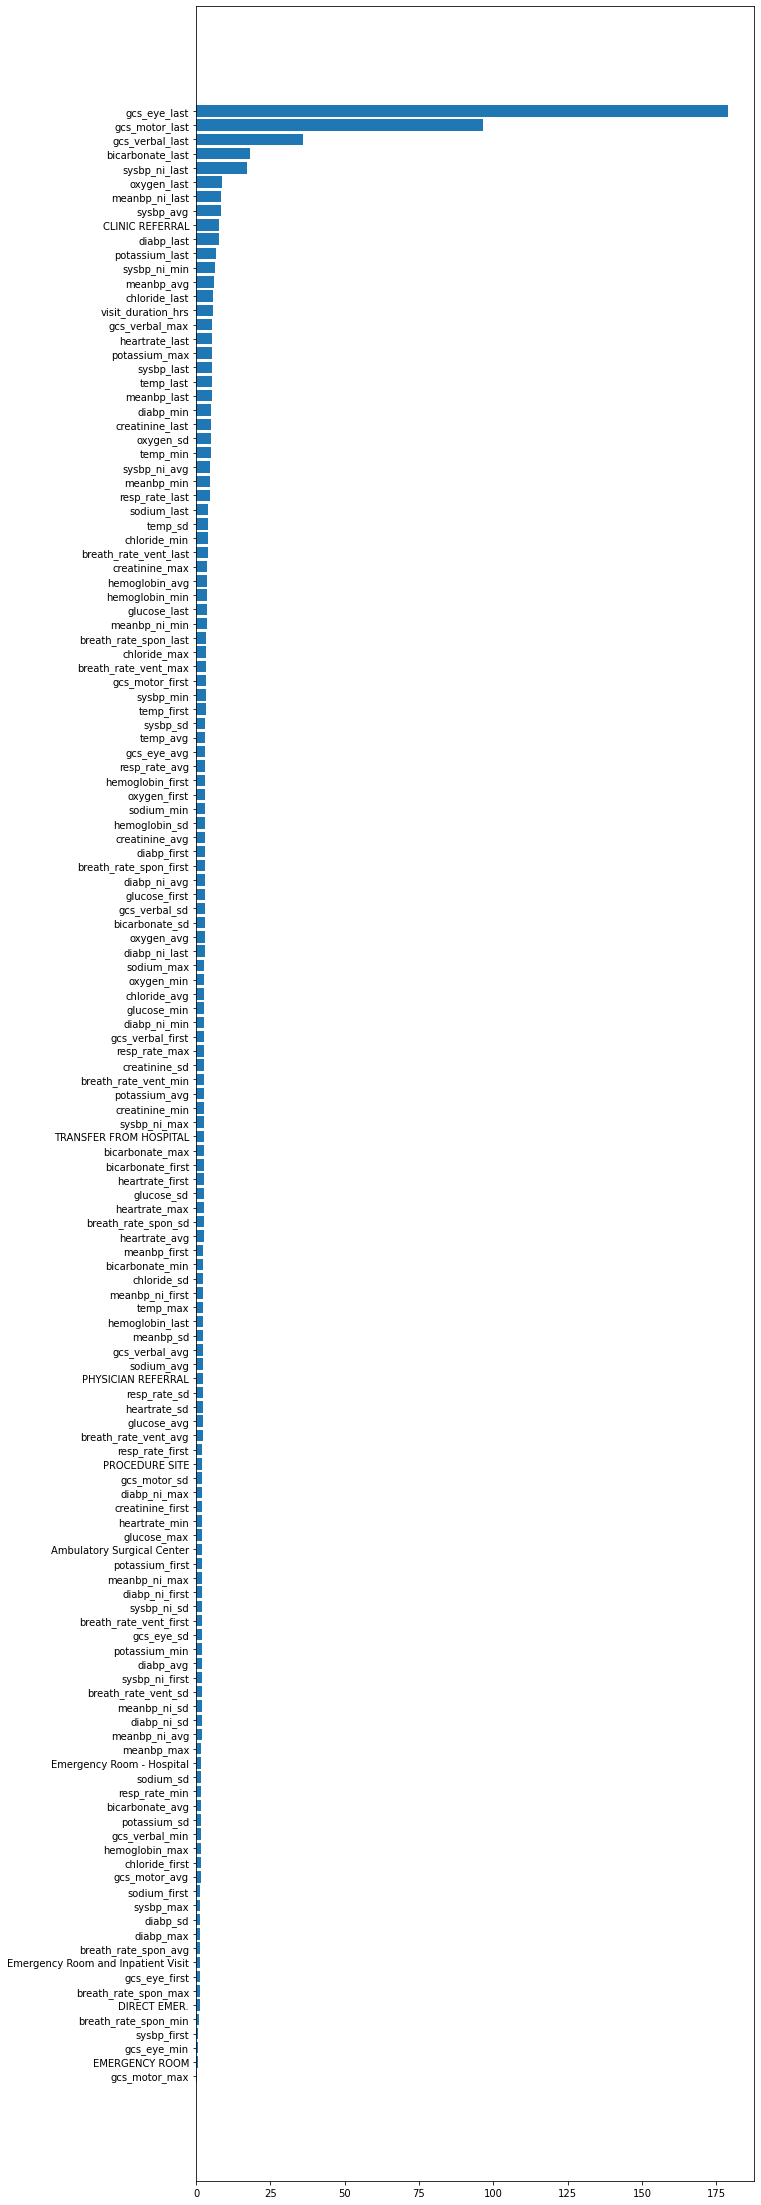

In [63]:
X_header = [x for x in X.columns.values]
X_header = X_header[0:-1]
feature_importance_list = []
feature_imp_dict = xgb.get_booster().get_score(importance_type="gain")
for feature, feature_imp in feature_imp_dict.items():
    feature_importance_list.append([feature, feature_imp])
xgbDf = pd.DataFrame(feature_importance_list, columns = ['feature', 'weight'])
xgbDf.sort_values('weight', inplace=True)
plt.figure(figsize=(10,40))
plt.barh(y=xgbDf.feature, width=xgbDf.weight)

In [64]:
xgb = XGBClassifier()
xgb.fit(X_train, y_ninety_day_train)
y_ninety_day_pred = xgb.predict(X_test)

/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 140 artists>

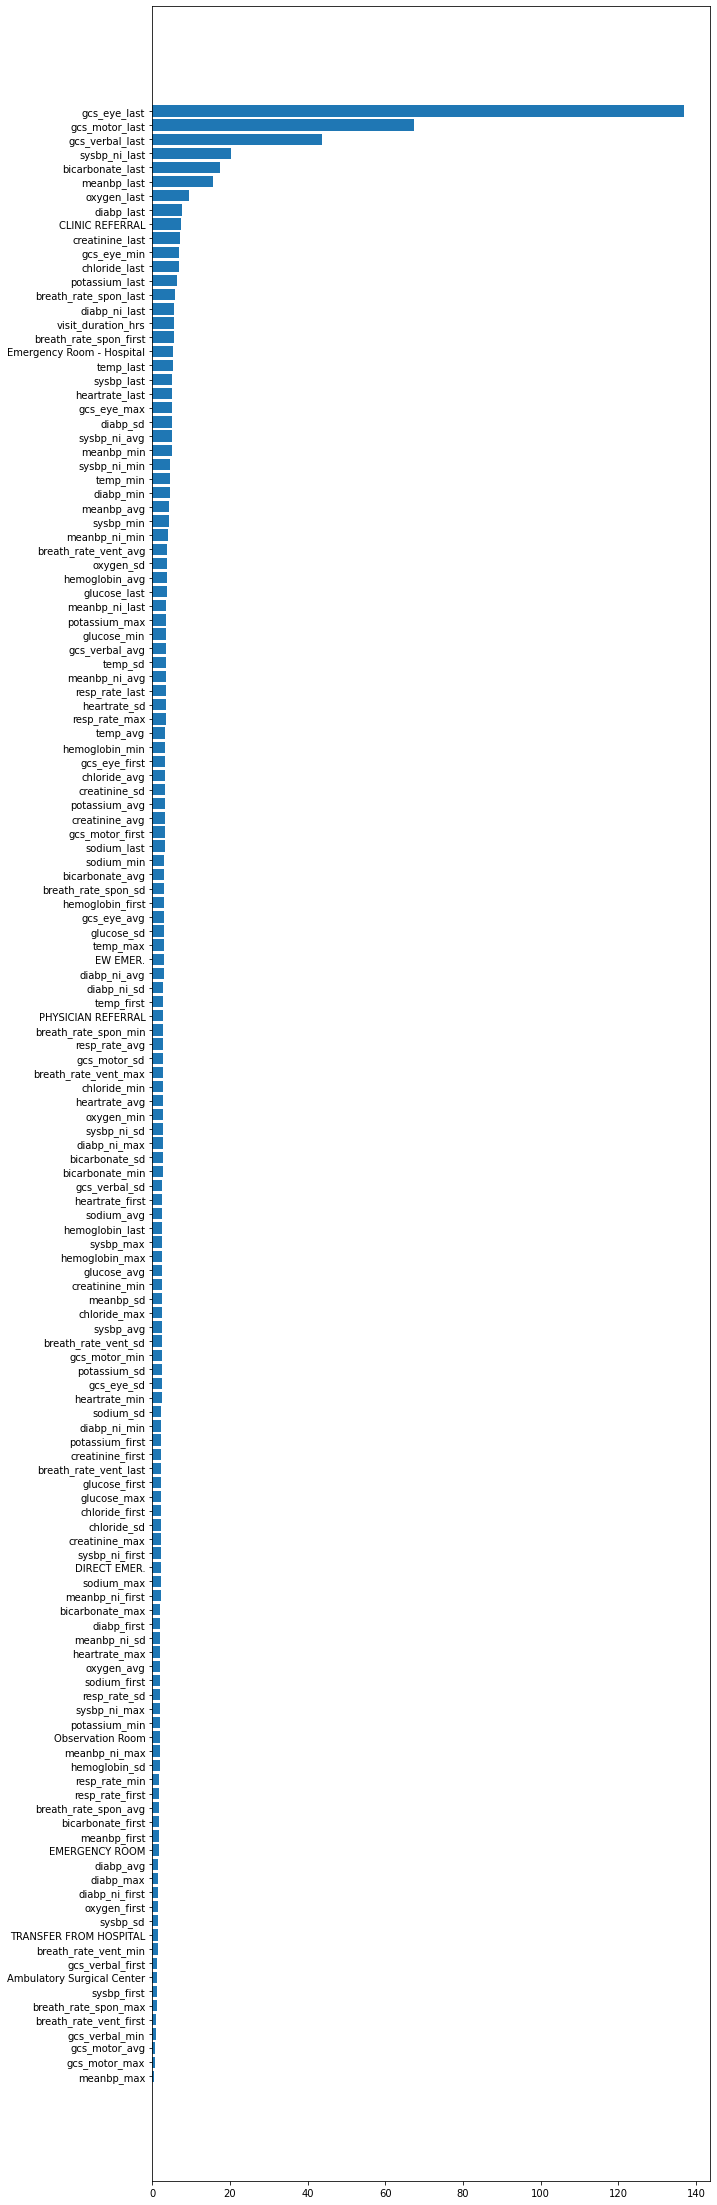

In [65]:
X_header = [x for x in X.columns.values]
X_header = X_header[0:-1]
feature_importance_list = []
feature_imp_dict = xgb.get_booster().get_score(importance_type="gain")
for feature, feature_imp in feature_imp_dict.items():
    feature_importance_list.append([feature, feature_imp])
xgbDf = pd.DataFrame(feature_importance_list, columns = ['feature', 'weight'])
xgbDf.sort_values('weight', inplace=True)
plt.figure(figsize=(10,40))
plt.barh(y=xgbDf.feature, width=xgbDf.weight)

In [66]:
from sklearn.metrics import accuracy_score

print('Discharge mortality: ', str(accuracy_score(y_discharge_pred, y_discharge_test)))
print('One day mortality: ', str(accuracy_score(y_one_day_pred, y_one_day_test)))
print('Two day mortality: ', str(accuracy_score(y_two_day_pred, y_two_day_test)))
print('Thirty day mortality: ', str(accuracy_score(y_thirty_day_pred, y_thirty_day_test)))
print('Sixty day mortality: ', str(accuracy_score(y_sixty_day_pred, y_sixty_day_test)))
print('Ninety day mortality: ', str(accuracy_score(y_ninety_day_pred, y_ninety_day_test)))

Discharge mortality:  0.9279826464208243
One day mortality:  0.9288503253796095
Two day mortality:  0.93058568329718
Thirty day mortality:  0.9201735357917571
Sixty day mortality:  0.9101952277657267
Ninety day mortality:  0.9028199566160521


In [67]:
from sklearn.metrics import roc_auc_score

print('Discharge mortality ROC: ', str(roc_auc_score(y_discharge_pred, y_discharge_test)))
print('One day mortality ROC: ', str(roc_auc_score(y_one_day_pred, y_one_day_test)))
print('Two day mortality ROC: ', str(roc_auc_score(y_two_day_pred, y_two_day_test)))
print('Thirty day mortality ROC: ', str(roc_auc_score(y_thirty_day_pred, y_thirty_day_test)))
print('Sixty day mortality ROC: ', str(roc_auc_score(y_sixty_day_pred, y_sixty_day_test)))
print('Ninety day mortality ROC: ', str(roc_auc_score(y_sixty_day_pred, y_sixty_day_test)))

Discharge mortality ROC:  0.9157379924752996
One day mortality ROC:  0.9190710827223985
Two day mortality ROC:  0.9216983304154357
Thirty day mortality ROC:  0.9145104803721708
Sixty day mortality ROC:  0.9063955478680756
Ninety day mortality ROC:  0.9063955478680756


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10), title='Confusion Matrix for the classifier'):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title(title)
    plt.show()

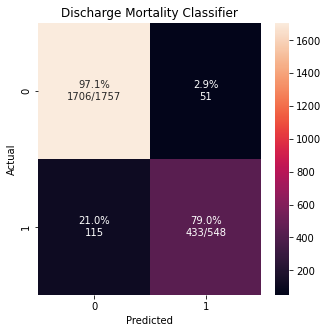

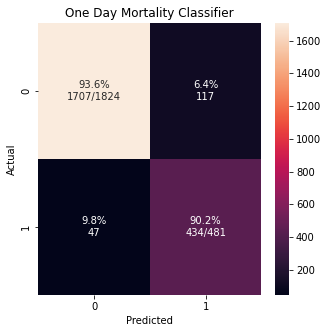

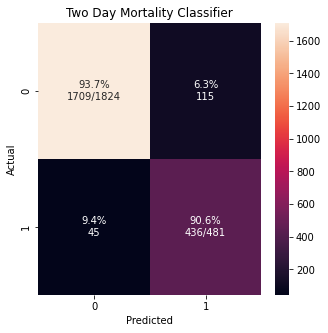

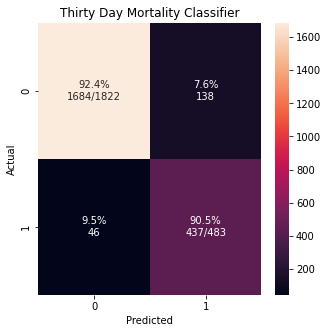

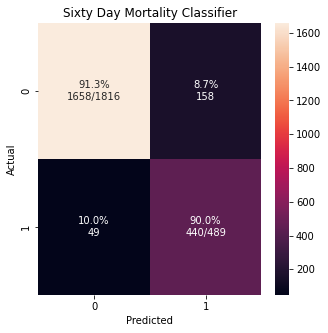

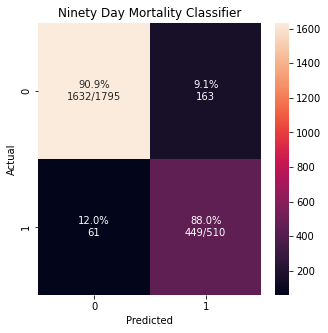

In [69]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

labels = [0, 1]

cm_analysis(y_discharge_test, y_discharge_pred, labels, ymap=None, figsize=(5, 5), title='Discharge Mortality Classifier')

cm_analysis(y_one_day_pred, y_one_day_test, labels, ymap=None, figsize=(5, 5), title='One Day Mortality Classifier')

cm_analysis(y_two_day_pred, y_two_day_test, labels, ymap=None, figsize=(5, 5), title='Two Day Mortality Classifier')

cm_analysis(y_thirty_day_pred, y_thirty_day_test, labels, ymap=None, figsize=(5, 5), title='Thirty Day Mortality Classifier')

cm_analysis(y_sixty_day_pred, y_sixty_day_test, labels, ymap=None, figsize=(5, 5), title='Sixty Day Mortality Classifier')

cm_analysis(y_ninety_day_pred, y_ninety_day_test, labels, ymap=None, figsize=(5, 5), title='Ninety Day Mortality Classifier')

## Machine Learning using Deep Learning

In [70]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential

In [71]:
model = Sequential()

model.add(
    layers.Dense(X_train.shape[1],
        activation=tf.nn.relu,
        kernel_initializer='he_normal',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5)
    )
)

model.add(
    tf.keras.layers.Dropout(.4)
)

model.add(
    layers.Dense(X_train.shape[1]/2,
        activation=tf.nn.relu,
        kernel_initializer='he_normal',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5)
    )
)

model.add(
    tf.keras.layers.Dropout(.4)
)

model.add(
    layers.Dense(1,
        activation=tf.nn.sigmoid,
        kernel_initializer='he_normal',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5)
    )
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [72]:
model.fit(X_train.fillna(X_train.mean()), y_discharge_train, epochs=20, batch_size=64)

Epoch 1/20
144/144 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.8528
Epoch 2/20
144/144 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.9041
Epoch 3/20
144/144 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.9134
Epoch 4/20
144/144 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.9146
Epoch 5/20
144/144 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9184
Epoch 6/20
144/144 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9237
Epoch 7/20
144/144 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9245
Epoch 8/20
144/144 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9278
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.9331
Epoch 10/20
144/144 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9293

In [73]:
y_discharge_pred_probs = model.predict(X_test.fillna(X_test.mean()))
y_discharge_pred = np.where(y_discharge_pred_probs > 0.5, 1, 0)

Discharge mortality accuracy:  0.9262472885032538
Discharge mortality ROC:  0.9224933777907882


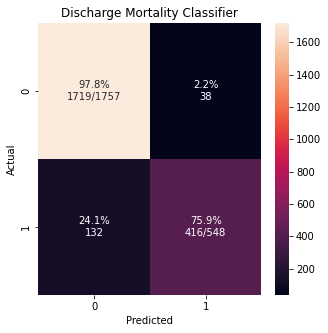

In [74]:
from sklearn.metrics import accuracy_score

print('Discharge mortality accuracy: ', str(accuracy_score(y_discharge_pred, y_discharge_test)))
print('Discharge mortality ROC: ', str(roc_auc_score(y_discharge_pred, y_discharge_test)))
cm_analysis(y_discharge_test, y_discharge_pred, labels, ymap=None, figsize=(5, 5), title='Discharge Mortality Classifier')